In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#reading database and removing NULL values if any
data=pd.read_csv("Banknote-authentication-dataset-.csv")
data.dropna()
data.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [5]:
#Extracting values
x=data["V1"]
y=data["V2"]

In [6]:
print("X_max : ",x.max())
print("X_min : ",x.min())
print("Y_max : ",y.max())
print("Y_min : ",y.min())

X_max :  6.8248
X_min :  -7.0421
Y_max :  12.9516
Y_min :  -13.7731


In [9]:
#performing normaliztion for both features
mean_x = x.mean()
mean_y = y.mean()
max_x = x.max()
max_y = y.max()
min_x = x.min()
min_y = y.min()
for i in range(0, x.size):
    x[i] = (x[i] - mean_x) / (max_x - min_x)
for i in range(0, y.size):
    y[i] = (y[i] - mean_y) / (max_y - min_y)

In [45]:
mean_x

0.43373525728862977

In [12]:
 print(x[i], y[i])

-0.21458547024126734 -0.09655461505615612


In [32]:
#Performing Clustering
res = KMeans(n_clusters=2, ).fit(np.column_stack((x,y)))

xval_0=[]
yval_0=[]
xval_1=[]
yval_1=[]
for i in range(0,x.size):
    if(res.labels_[i] > 0):
        xval_0.append(x[i])
        yval_0.append(y[i])
    else:
        xval_1.append(x[i])
        yval_1.append(y[i])

Text(0, 0.5, 'V2')

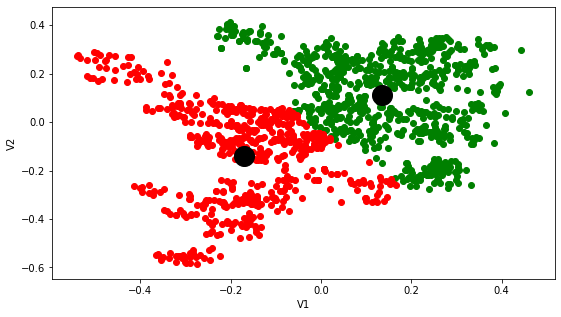

In [37]:
#Plotting the values and cluster centres
fig, ax = plt.subplots(figsize= (9,5))
ax.scatter(xval_0,yval_0,c= "green")
ax.scatter(xval_1,yval_1,c="red")
ax.scatter(res.cluster_centers_[:,0],res.cluster_centers_[:,1],c="black" , s= 400)
ax.set_xlabel("V1")
ax.set_ylabel("V2")

In [43]:
len(yval_1)

607

In [44]:
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)